# Dataset Description

This dataset contains paired files defining interaction potentials and their corresponding structure factors.  
Each row in the two files represents one data sample — the same row index corresponds to the same configuration.

- **`./target_xxx.csv`** → Potential parameters  
- **`./input_xxx.csv`** → Structure factors $ S(Q) $

---

## File 1: `target_xxx.csv`
Each row contains four scalar parameters:

| Column | Symbol | Description |
|:------:|:--------|:-------------|
| 1 | $ \phi $ | Volume fraction |
| 2 | $ 1/\kappa $ | Debye screening length |
| 3 | $ \beta A $ | Contact potential amplitude |
| 4 | $ Z $ | Effective charge (redundant) |

Only three parameters are independent:  
$ Z $ can be determined from $ \kappa D $ and $ A $.

---

## File 2: `input_xxx.csv`
Each row contains a vector of structure factor values $ S(Q) $ corresponding to the potential parameters in the same row of `target_xxx.csv`.
- Each $S(Q)$ vector has **80 points** sampled over  
  $$
  Q = \{ 0.02, 0.04, 0.06, \ldots, 16.00 \}
  $$
  i.e. $ Q_i = 0.02 \times i $ for $ i = 1, 2, \ldots, 80 $.
- Columns correspond to these fixed $ Q $-bins. 

---

S(Q) shape: (18750, 80)   -> N_samples=18750, N_Q=80
Parameters shape: (18750, 4)   -> N_samples=18750, N_params=4


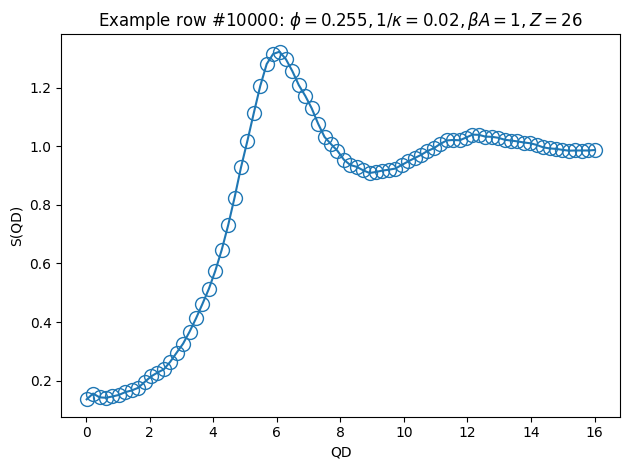

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Filenames
filename_input  = "./input_grid_all_GPR80.csv"
filename_target = "./target_grid_all.csv"

# === Load numeric data (no headers) ===
S = np.loadtxt(filename_input, delimiter=",")   # structure factors
T = np.loadtxt(filename_target, delimiter=",")  # parameters

# === Check shapes ===
print(f"S(Q) shape: {S.shape}   -> N_samples={S.shape[0]}, N_Q={S.shape[1]}")
print(f"Parameters shape: {T.shape}   -> N_samples={T.shape[0]}, N_params={T.shape[1]}")

if S.shape[0] != T.shape[0]:
    raise ValueError("Input and target files must have the same number of rows!")

# === Plot one example structure factor ===
i = 10000  # sample index to visualize
phi, inv_kappa, betaA, Z = T[i]
Q = np.linspace(0.02, 16.00, num=80)
plt.plot(Q, S[i], lw=1.5, marker='o', markersize=10, fillstyle='none')
plt.xlabel("QD")
plt.ylabel("S(QD)")
plt.title(rf"Example row #{i}: $\phi={phi:.3g}, 1/\kappa={inv_kappa:.3g}, \beta A={betaA:.3g}, Z={Z:.3g}$")
plt.tight_layout()
plt.show()

